In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report



import scipy.stats as stats
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns',None)
tdata = pd.read_csv("E:/New folder (3)/DM/New folder/train.csv")
edata=pd.read_csv("E:/New folder (3)/DM/New folder/test.csv")


In [3]:
tdata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
tdata.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
#normalize numeric values and delete outlier
#for cols in tdata.columns:
  #  if tdata[cols].dtype=='int64' or tdata[cols].dtype=='float64':
   #     tdata[cols]=((tdata[cols]-tdata[cols].mean())/(tdata[cols].std()))
    #    upper_range=tdata[cols].mean()+3*tdata[cols].std()
     #   lower_range=tdata[cols].mean()-3*tdata[cols].std()
      #  indexs=tdata[(tdata[cols]>upper_range)| (tdata[cols]<lower_range)].index
       # tdata=tdata.drop(indexs)
#tdata.head() 
#tdata.shape     

In [6]:
for cols in tdata.columns:
    if tdata[cols].dtype=='int64' or tdata[cols].dtype=='float64':
        upper_range=tdata[cols].mean()+3*tdata[cols].std()
        lower_range=tdata[cols].mean()-3*tdata[cols].std()
        indexs=tdata[(tdata[cols]>upper_range)| (tdata[cols]<lower_range)].index
        tdata=tdata.drop(indexs)
tdata.shape

(1988, 21)

In [8]:
tdata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
edata.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


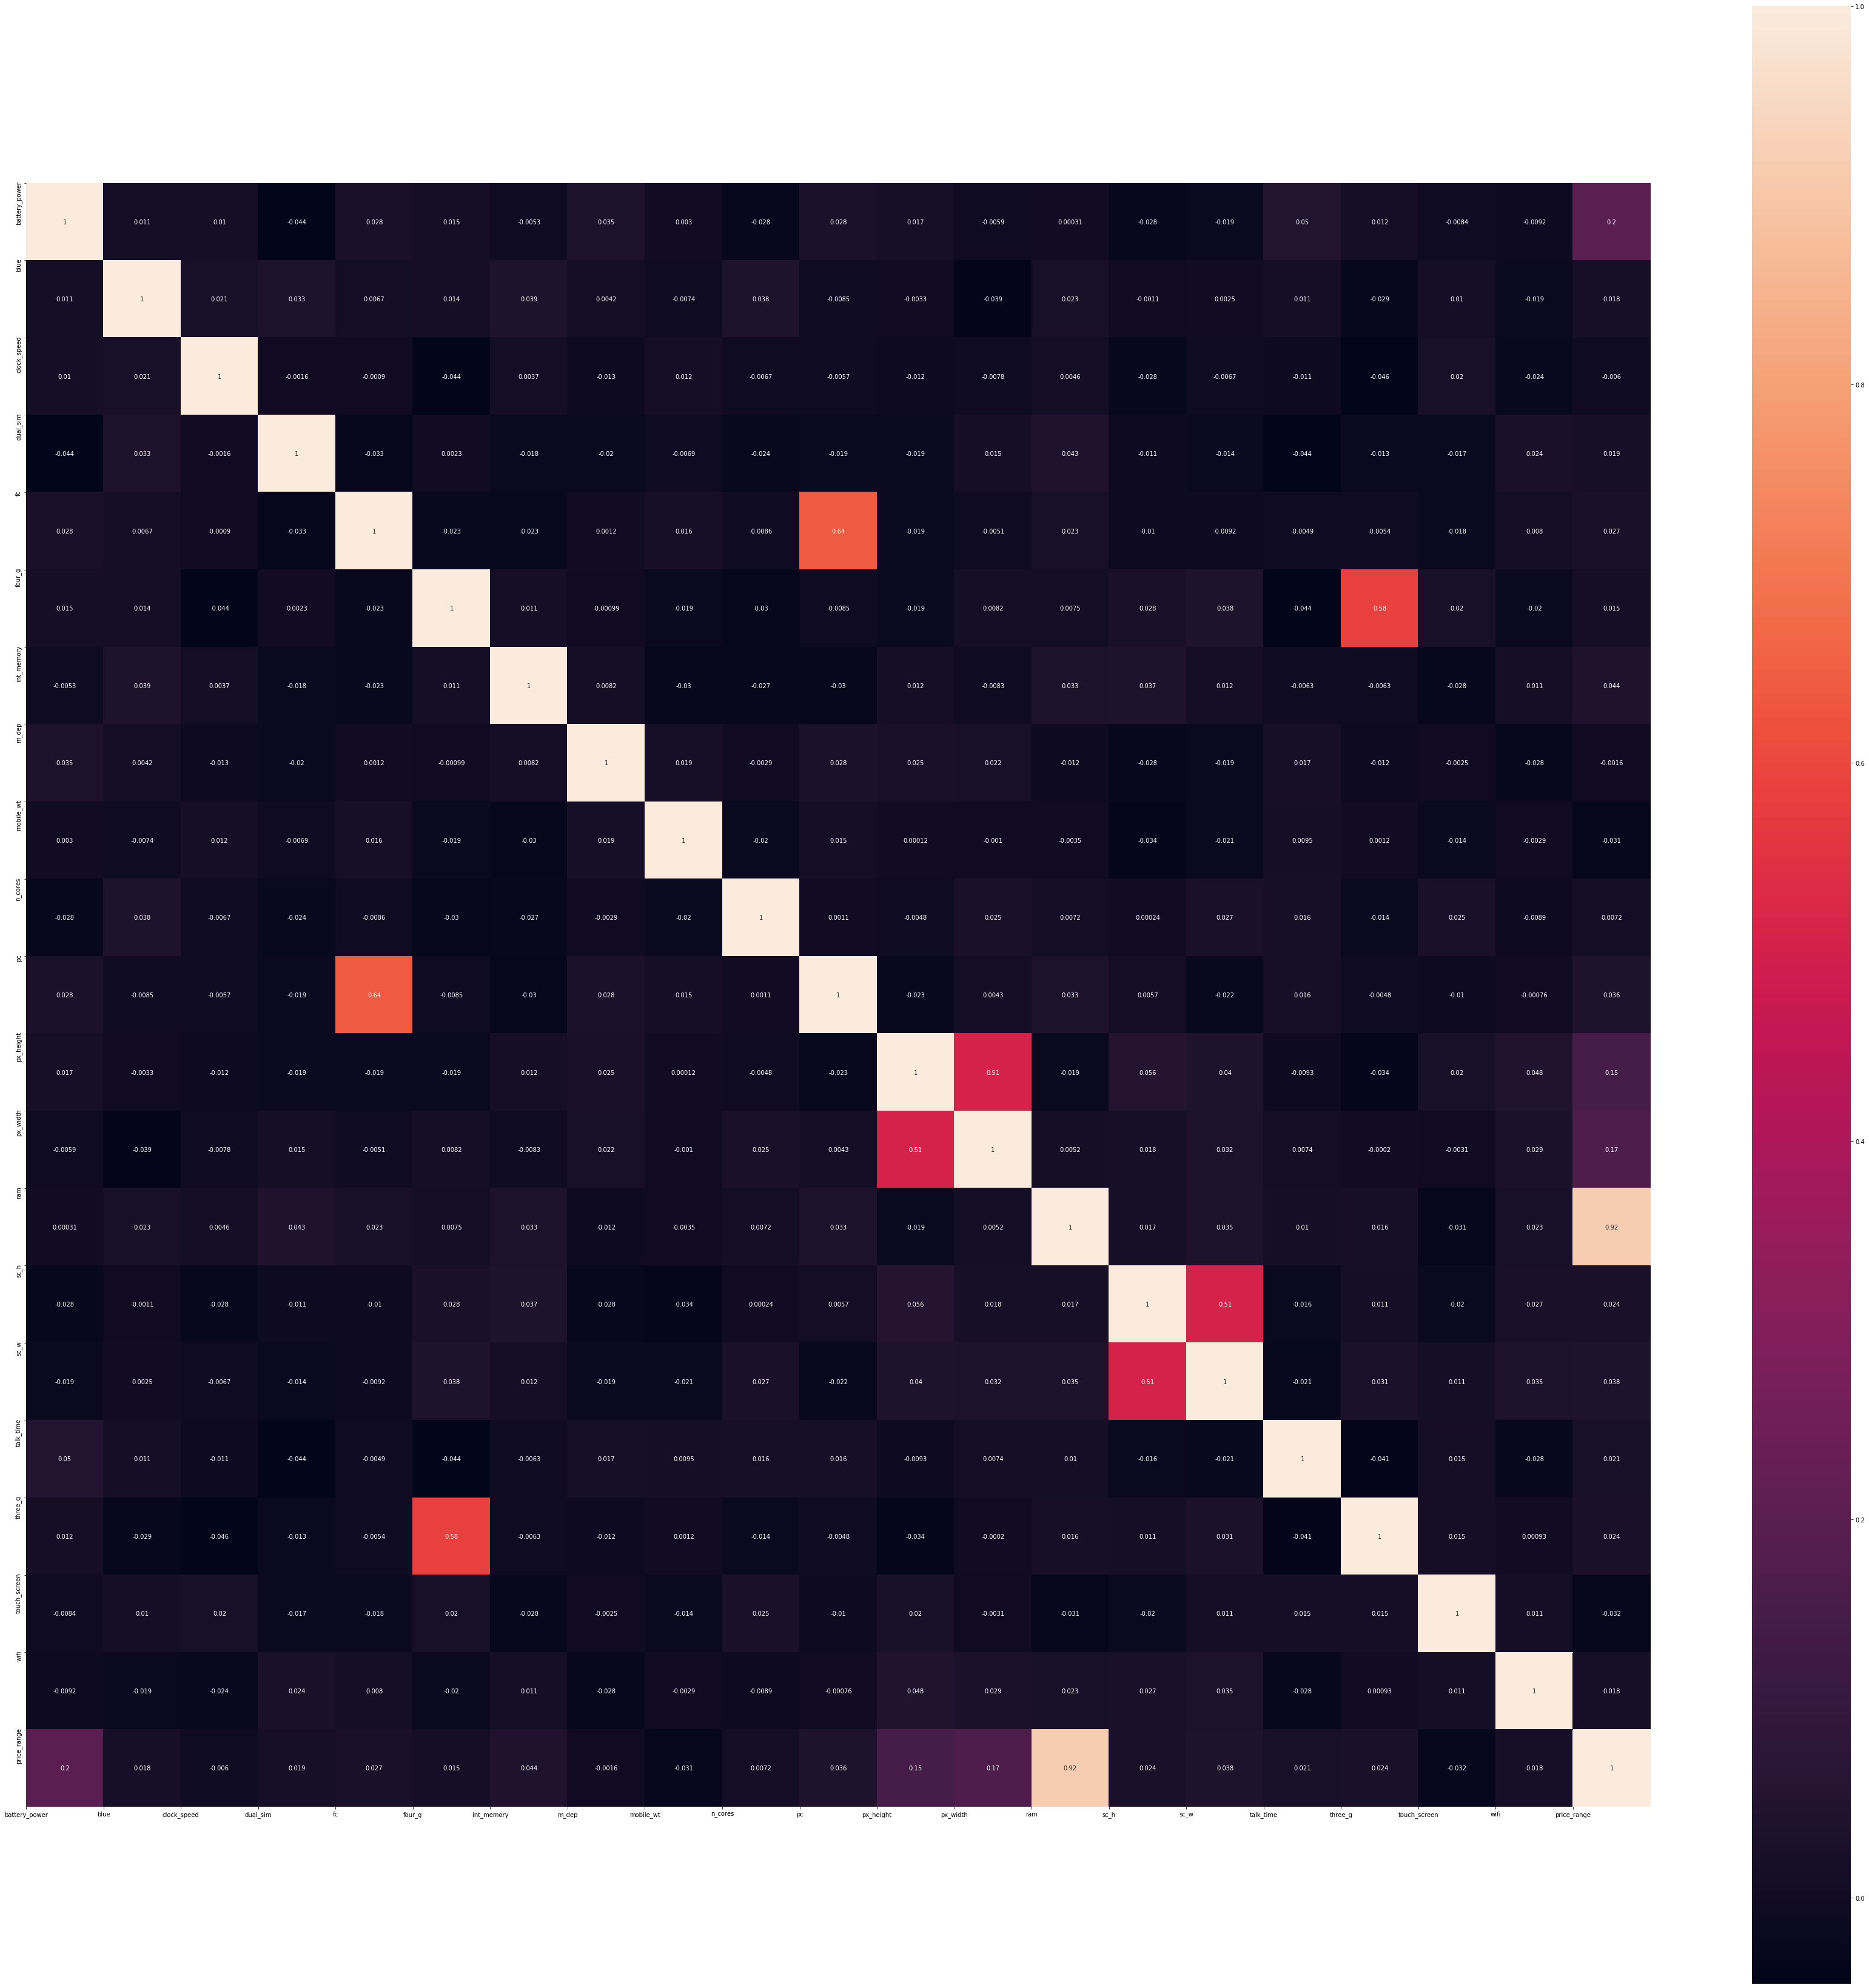

ram            0.916742
price_range    1.000000
Name: price_range, dtype: float64

In [10]:
corr=tdata.corr()
f,ax=plt.subplots(figsize=(60,60))
sns.heatmap(corr,square=True , annot=True)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()
#Correlation with output variable
cor_target = corr['price_range']
#Select highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

In [11]:
#Correlation with output variable
cor_target = corr['price_range']
#Select highly correlated features
relevant_features = cor_target[cor_target<0.5]
relevant_features

battery_power    0.201768
blue             0.018009
clock_speed     -0.006042
dual_sim         0.019325
fc               0.027334
four_g           0.015254
int_memory       0.044144
m_dep           -0.001570
mobile_wt       -0.031180
n_cores          0.007159
pc               0.036343
px_height        0.150439
px_width         0.167571
sc_h             0.024294
sc_w             0.037836
talk_time        0.020810
three_g          0.023952
touch_screen    -0.031501
wifi             0.018434
Name: price_range, dtype: float64

In [12]:

tdata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
y1 = tdata['price_range']
x1= tdata.drop(columns = ['price_range'])

X_train, X_test, y_train, y_test = train_test_split( x1, y1, test_size=0.2, random_state=42)

######Create a # Linear Kernel svm Classifier
clf = svm.SVC(kernel='linear')

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))

report =classification_report(y_test, y_pred)
print('report:', report, sep='\n')

Accuracy: 0.9597989949748744
Precision: 0.9621458082440818
Recall: 0.9597989949748744
report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       106
           1       0.90      0.99      0.94       100
           2       0.99      0.90      0.94        99
           3       0.97      0.99      0.98        93

    accuracy                           0.96       398
   macro avg       0.96      0.96      0.96       398
weighted avg       0.96      0.96      0.96       398



In [14]:


#Create an rbf Kernel svm Classifier
clf = svm.SVC(kernel='rbf') 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

report =classification_report(y_test, y_pred)
print('report:', report, sep='\n')

C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.23366834170854273
Precision: 0.05841708542713568
Recall: 0.25
report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00        99
           3       0.23      1.00      0.38        93

    accuracy                           0.23       398
   macro avg       0.06      0.25      0.09       398
weighted avg       0.05      0.23      0.09       398



C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
#Create a sigmoid svm Classifier
clf = svm.SVC(kernel='sigmoid')

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

report =classification_report(y_test, y_pred)
print('report:', report, sep='\n')

C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy: 0.23366834170854273
Precision: 0.05841708542713568
Recall: 0.25
report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00        99
           3       0.23      1.00      0.38        93

    accuracy                           0.23       398
   macro avg       0.06      0.25      0.09       398
weighted avg       0.05      0.23      0.09       398



In [16]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf',gamma=0.1)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

report =classification_report(y_test, y_pred)
print('report:', report, sep='\n')

Accuracy: 0.23366834170854273
Precision: 0.05841708542713568
Recall: 0.25
report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00        99
           3       0.23      1.00      0.38        93

    accuracy                           0.23       398
   macro avg       0.06      0.25      0.09       398
weighted avg       0.05      0.23      0.09       398



C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf',gamma=1) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))

report =classification_report(y_test, y_pred)
print('report:', report, sep='\n')

Accuracy: 0.23366834170854273
Precision: 0.054600893916820284
Recall: 0.23366834170854273
report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00        99
           3       0.23      1.00      0.38        93

    accuracy                           0.23       398
   macro avg       0.06      0.25      0.09       398
weighted avg       0.05      0.23      0.09       398



C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


TypeError: '(slice(None, None, None), 0)' is an invalid key

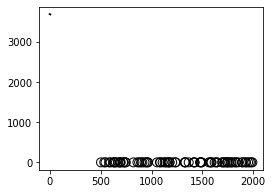

In [18]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm



# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(x1, y1)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k',
                cmap=cm.get_cmap('RdBu'))
    plt.scatter(x1[:, 0], x1[:, 1], c=y1, zorder=10, cmap=cm.get_cmap('RdBu'),
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=cm.get_cmap('RdBu'),
                 alpha=0.5, linestyles=['-'])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

(array([357., 336., 325., 314., 327., 329.]),
 array([ 501. ,  750.5, 1000. , 1249.5, 1499. , 1748.5, 1998. ]),
 <a list of 6 Patch objects>)

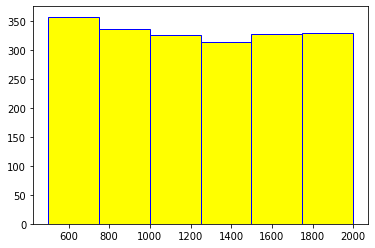

In [19]:
plt.hist(tdata['battery_power'], bins=6, color="yellow", edgecolor="blue")

(array([260.,  57., 763.,  69., 153., 686.]),
 array([ 501,  680,  720, 1300, 1350, 1480, 2000]),
 <a list of 6 Patch objects>)

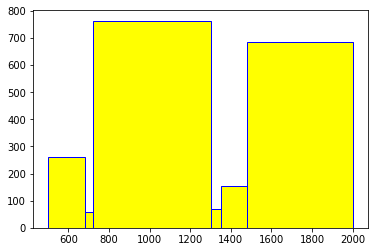

In [20]:
plt.hist(tdata['battery_power'], bins=[501, 680, 720, 1300, 1350,1480, 2000], color="yellow", edgecolor="blue")

In [21]:
tdata['space']= tdata['sc_h']*tdata['sc_w']


In [22]:
tdata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,space
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,22
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,16


In [23]:
label_encoder = LabelEncoder()
for cols in tdata.columns:
    tdata[cols]=label_encoder.fit_transform(tdata[cols])

In [24]:
#Create an rbf Kernel svm Classifier
clf = svm.SVC(kernel='rbf') 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred,average='macro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred,average='macro'))

report =classification_report(y_test, y_pred)
print('report:', report, sep='\n')

C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.23366834170854273
Precision: 0.05841708542713568
Recall: 0.25
report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00        99
           3       0.23      1.00      0.38        93

    accuracy                           0.23       398
   macro avg       0.06      0.25      0.09       398
weighted avg       0.05      0.23      0.09       398



C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
#Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#making the model with entropy methode
tree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)

#make prediction
prediction = tree.predict(X_test)

#Check the accuracy

print("The prediction accuracy is: ",tree.score(X_test,y_test)*100,"%")

The prediction accuracy is:  81.90954773869346 %


In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)

C:\Users\POP RAYANEH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
print(clf.predict(X_test))

[0 0 0 3 0 0 1 2 3 0 2 1 0 2 0 0 2 3 0 2 3 0 2 1 3 0 0 0 0 2 3 3 1 0 2 3 1
 3 0 1 3 2 2 1 1 3 0 3 1 0 1 3 1 0 1 0 3 0 2 2 1 2 2 1 0 1 1 3 3 0 3 0 1 1
 2 1 1 0 3 3 0 0 2 3 3 0 0 0 3 1 3 1 1 0 0 1 0 3 0 0 3 2 0 3 1 2 2 0 3 3 0
 1 0 2 2 0 2 1 1 1 1 2 1 3 1 0 0 0 1 1 1 0 1 3 2 1 0 3 1 0 2 1 3 2 2 2 3 2
 1 1 1 0 0 3 3 0 3 1 1 1 3 2 3 1 3 0 1 3 3 2 1 0 1 2 1 3 2 3 2 0 0 0 1 0 1
 0 1 2 1 1 0 2 3 0 0 2 1 3 1 1 0 1 0 1 1 1 3 2 2 0 3 0 0 2 3 1 1 0 0 3 1 1
 1 1 0 3 2 2 3 0 3 1 2 3 3 0 2 0 3 1 3 0 1 1 1 1 2 1 2 1 0 0 2 2 3 1 1 2 0
 1 1 3 2 3 1 3 2 1 1 0 0 3 0 3 2 3 3 1 0 2 3 2 3 3 2 0 0 1 1 0 1 0 1 0 3 2
 3 0 1 2 1 3 2 2 2 3 0 1 3 1 0 3 3 0 2 0 0 0 1 0 0 2 1 0 0 0 0 3 3 0 2 1 1
 1 3 3 0 1 0 1 1 1 0 1 0 0 0 3 0 2 2 0 0 0 0 3 3 3 3 1 1 0 1 0 0 3 0 1 3 0
 2 0 0 2 3 1 2 3 2 2 1 1 0 3 0 1 0 2 1 1 2 3 3 0 0 3 2 2]


In [28]:
clf.score(X_test,y_test )

0.678391959798995

In [41]:
######################BICOIN
import pandas as pd
import numpy as np

bitdata = pd.read_csv("C:/Users/POP RAYANEH/Downloads/Bitcoin Historical Data - Investing.com.csv")
bitdata.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 01, 2021","36,687.6","37,294.3","37,850.3","35,742.7",113.48K,-1.64%
1,"May 31, 2021","37,298.6","35,644.0","37,480.7","34,213.2",131.70K,4.62%
2,"May 30, 2021","35,652.8","34,589.3","36,388.6","33,441.0",104.18K,3.09%
3,"May 29, 2021","34,584.6","35,664.5","37,227.1","33,664.2",160.43K,-3.02%
4,"May 28, 2021","35,662.5","38,543.2","38,844.1","34,772.4",199.58K,-7.17%


In [42]:
##### change date type
from datetime import datetime

def mdy_to_ymd(i):
    return datetime.strptime(i, '%b %d, %Y').strftime('%Y-%m-%d')
for i in bitdata['Date']:
    mdy_to_ymd(i)

In [43]:
bitdata.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 01, 2021","36,687.6","37,294.3","37,850.3","35,742.7",113.48K,-1.64%
1,"May 31, 2021","37,298.6","35,644.0","37,480.7","34,213.2",131.70K,4.62%
2,"May 30, 2021","35,652.8","34,589.3","36,388.6","33,441.0",104.18K,3.09%
3,"May 29, 2021","34,584.6","35,664.5","37,227.1","33,664.2",160.43K,-3.02%
4,"May 28, 2021","35,662.5","38,543.2","38,844.1","34,772.4",199.58K,-7.17%
